<a href="https://colab.research.google.com/gist/Arshkaur1/47e28c6d2b1d75b0f3906e74b983b738/ibmcapstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

/bin/bash: conda: command not found
     |████████████████████████████████| 98 kB 1.3 MB/s 
/bin/bash: conda: command not found
Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the

In [5]:
csv_file.close()

In [6]:
manchester_raw = pd.read_csv('manchester.csv')

In [7]:
manchester_raw.shape

(64, 1)

In [8]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399432,-2.294060
1,Barlow Moor,53.426562,-2.266241
2,"Belle Vue, Manchester",53.463060,-2.197180
3,Benchill,53.389117,-2.265841
4,"Beswick, Manchester",53.483817,-2.215130


In [12]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [14]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [15]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [16]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [18]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.399432,-2.29406,Lidl,Supermarket,53.400455,-2.295649
1,Baguley,53.399432,-2.29406,B&M Store,Furniture / Home Store,53.401589,-2.299105
2,Baguley,53.399432,-2.29406,Costa Coffee,Coffee Shop,53.400795,-2.295027
3,Baguley,53.399432,-2.29406,Aldi,Supermarket,53.401268,-2.299659
4,Baguley,53.399432,-2.29406,McDonald's,Fast Food Restaurant,53.400461,-2.289088


In [19]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Betting Shop,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Concert Hall,Convenience Store,Cricket Ground,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Office,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Plaza,Polish Restaurant,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Betting Shop,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Concert Hall,Convenience Store,Cricket Ground,Cultural Center,Cupcake Shop,Deli / Bodega,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Office,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Plaza,Polish Restaurant,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.000000,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.071429,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.214286,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.0,0.142857,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.

In [21]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [22]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Garden,Coffee Shop,Furniture / Home Store,Donut Shop,Fast Food Restaurant,Clothing Store,Pet Store,Gym / Fitness Center
1,Barlow Moor,Grocery Store,Forest,Golf Course,Lake,Indian Restaurant,Hotel,Bus Station,Outdoor Supply Store,Tram Station,Park
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Dessert Shop,Gym,Racetrack,Discount Store,Convenience Store,Restaurant,Fast Food Restaurant,Pharmacy
3,Benchill,Tram Station,Bus Stop,Bus Station,Pub,Supermarket,Bakery,Photography Studio,Boat or Ferry,Performing Arts Venue,Newsagent
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Grocery Store,Tennis Court,Soccer Stadium,Park,Sporting Goods Shop,Concert Hall


In [23]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [25]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

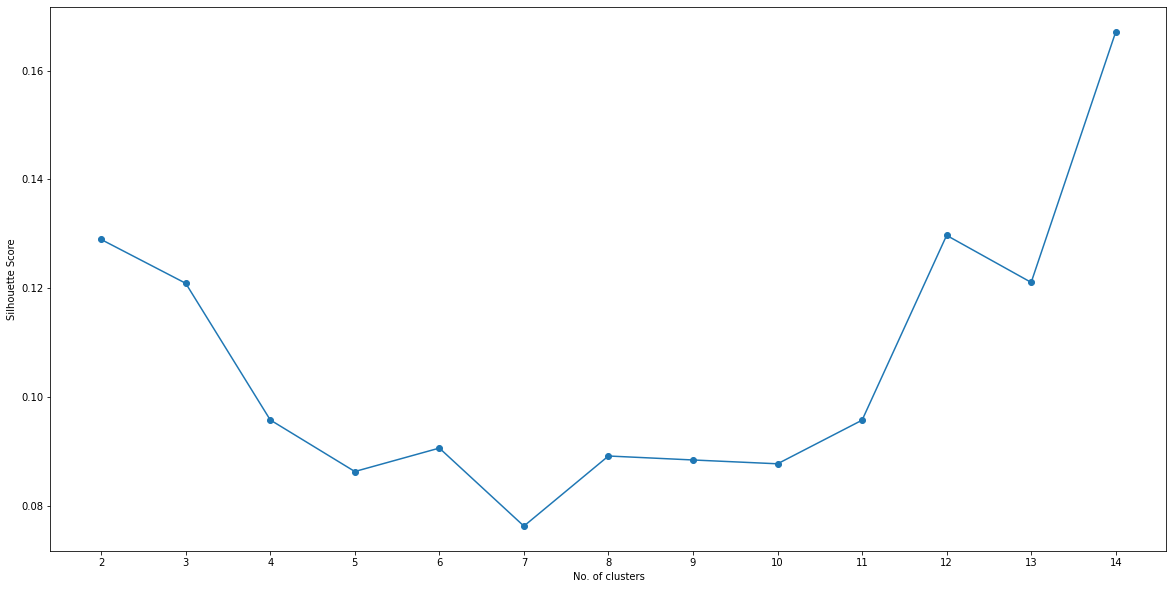

In [26]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [27]:
opt_value = 8

In [28]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [29]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [30]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399432,-2.294060,2,Tram Station,Supermarket,Garden,Coffee Shop,Furniture / Home Store,Donut Shop,Fast Food Restaurant,Clothing Store,Pet Store,Gym / Fitness Center
1,Barlow Moor,53.426562,-2.266241,4,Grocery Store,Forest,Golf Course,Lake,Indian Restaurant,Hotel,Bus Station,Outdoor Supply Store,Tram Station,Park
2,"Belle Vue, Manchester",53.463060,-2.197180,0,Supermarket,Grocery Store,Dessert Shop,Gym,Racetrack,Discount Store,Convenience Store,Restaurant,Fast Food Restaurant,Pharmacy
3,Benchill,53.389117,-2.265841,2,Tram Station,Bus Stop,Bus Station,Pub,Supermarket,Bakery,Photography Studio,Boat or Ferry,Performing Arts Venue,Newsagent
4,"Beswick, Manchester",53.483817,-2.215130,4,Coffee Shop,Bar,Italian Restaurant,Beer Bar,Grocery Store,Tennis Court,Soccer Stadium,Park,Sporting Goods Shop,Concert Hall


In [34]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [35]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Dessert Shop,Gym,Racetrack,Discount Store,Convenience Store,Restaurant,Fast Food Restaurant,Pharmacy
9,Burnage,Train Station,Supermarket,Rental Car Location,Grocery Store,Pizza Place,Bus Station,Liquor Store,Golf Course,Cricket Ground,Coffee Shop
10,Burnage (ward),Train Station,Supermarket,Rental Car Location,Grocery Store,Pizza Place,Bus Station,Liquor Store,Golf Course,Cricket Ground,Coffee Shop
25,Gorton,Chinese Restaurant,Bakery,Gym,Supermarket,Gymnastics Gym,Train Station,Market,Go Kart Track,Park,Bus Stop
34,Longsight,Grocery Store,Supermarket,Park,Indian Restaurant,Market,Sports Club,Pastry Shop,Fast Food Restaurant,Pharmacy,Turkish Restaurant
59,West Gorton,Sandwich Place,Sports Club,Electronics Store,Café,Chinese Restaurant,Climbing Gym,Train Station,Bus Station,Discount Store,Pizza Place


In [36]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Brooklands (Manchester ward),Pub,Hotel,Cocktail Bar,Restaurant,Asian Restaurant,Tea Room,Escape Room,Ramen Restaurant,English Restaurant,Polish Restaurant
11,Castlefield,Pub,Restaurant,Cocktail Bar,Concert Hall,Bar,Hotel,Gastropub,Multiplex,Polish Restaurant,Pizza Place
18,Circle Square Manchester,Pub,Bar,Coffee Shop,Café,Ethiopian Restaurant,Fast Food Restaurant,Park,College Arts Building,Gay Bar,Pop-Up Shop
22,Didsbury,Park,Pub,Italian Restaurant,Indian Restaurant,Bar,Grocery Store,Portuguese Restaurant,Bistro,Coffee Shop,Café
23,Fallowfield,Pub,Bar,Asian Restaurant,Supermarket,Gym / Fitness Center,Fast Food Restaurant,Portuguese Restaurant,Bike Trail,Chinese Restaurant,Coffee Shop
24,"Glenbrook, Greater Manchester",Pub,Hotel,Cocktail Bar,Restaurant,Asian Restaurant,Tea Room,Escape Room,Ramen Restaurant,English Restaurant,Polish Restaurant
26,Great Heaton,Pub,Italian Restaurant,Park,Coffee Shop,Pet Store,Newsagent,Office,Outdoor Supply Store,Pastry Shop,Performing Arts Venue
27,Green Quarter,Pub,Bar,Italian Restaurant,Restaurant,Indian Restaurant,Café,Deli / Bodega,Bakery,Vegetarian / Vegan Restaurant,Pool
31,Hulme,Bar,Pub,Café,Coffee Shop,Hotel,Mini Golf,Pop-Up Shop,Korean Restaurant,Fast Food Restaurant,Concert Hall
32,Ladybarn,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Park,Grocery Store,Discount Store,Gym / Fitness Center,Pizza Place,Fish & Chips Shop


In [37]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Garden,Coffee Shop,Furniture / Home Store,Donut Shop,Fast Food Restaurant,Clothing Store,Pet Store,Gym / Fitness Center
3,Benchill,Tram Station,Bus Stop,Bus Station,Pub,Supermarket,Bakery,Photography Studio,Boat or Ferry,Performing Arts Venue,Newsagent
19,"Clayton, Manchester",Supermarket,Tram Station,Pub,Coffee Shop,Park,Pet Store,Clothing Store,Fast Food Restaurant,Grocery Store,Gym
37,Miles Platting,Tram Station,Men's Store,Canal,Sandwich Place,Tennis Court,Thai Restaurant,Airport Service,Newsagent,Office,Outdoor Supply Store
43,Newton Heath,Supermarket,Fast Food Restaurant,Athletics & Sports,Park,Tram Station,Gymnastics Gym,Bus Stop,Shoe Store,Airport Service,Newsagent
49,Openshaw,Supermarket,Pet Store,Gym / Fitness Center,Discount Store,Bus Stop,Clothing Store,Pizza Place,Grocery Store,Gym,Tram Station
51,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Bakery,Deli / Bodega,Coffee Shop,Fish & Chips Shop,Supermarket,Tanning Salon,Market,Discount Store
53,Sharston,Airport Service,Tram Station,Bus Stop,Supermarket,Bus Station,Pizza Place,Pier,Pool,Polish Restaurant,Nature Preserve


In [38]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Manchester city centre,Coffee Shop,Pub,Café,Tea Room,Bar,Pizza Place,Fried Chicken Joint,Donut Shop,Brazilian Restaurant,Pie Shop
40,New Islington,Coffee Shop,Pub,Beer Bar,Bar,Tea Room,Pizza Place,Donut Shop,Bakery,Food Court,Record Shop
42,Newall Green,Coffee Shop,Pub,Convenience Store,Furniture / Home Store,Newsagent,Sandwich Place,Tram Station,Bus Stop,Pizza Place,Pier
46,Northern Quarter (Manchester),Coffee Shop,Café,Record Shop,Beer Bar,Indian Restaurant,Arts & Crafts Store,Tea Room,Sandwich Place,Restaurant,Ramen Restaurant
63,Wythenshawe,Bus Stop,Pub,Bar,Tram Station,Coffee Shop,Farm,Pharmacy,Office,Outdoor Supply Store,Park


In [39]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Grocery Store,Forest,Golf Course,Lake,Indian Restaurant,Hotel,Bus Station,Outdoor Supply Store,Tram Station,Park
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Beer Bar,Grocery Store,Tennis Court,Soccer Stadium,Park,Sporting Goods Shop,Concert Hall
6,Bradford-with-Beswick,Tram Station,Athletics & Sports,Lounge,Track Stadium,Theater,Thai Restaurant,Canal,Sporting Goods Shop,Park,Sandwich Place
7,"Bradford, Manchester",Tram Station,Athletics & Sports,Lounge,Track Stadium,Theater,Thai Restaurant,Canal,Sporting Goods Shop,Park,Sandwich Place
12,"Cheetham, Manchester",Clothing Store,Coffee Shop,Brewery,Grocery Store,Fast Food Restaurant,Sandwich Place,Food Court,Furniture / Home Store,Shopping Plaza,Office
20,Collyhurst,Clothing Store,Coffee Shop,Tram Station,Sporting Goods Shop,Pharmacy,Furniture / Home Store,Park,Shopping Plaza,Fast Food Restaurant,Concert Hall
21,Crumpsall,Coffee Shop,Ice Cream Shop,Tram Station,Park,Snack Place,Grocery Store,Sandwich Place,Halal Restaurant,Café,Bakery
36,Merseybank,Bus Station,Golf Course,Indian Restaurant,Forest,Hotel,Lake,Outdoor Supply Store,Fast Food Restaurant,Grocery Store,Office
45,Northern Moor,Grocery Store,Fast Food Restaurant,Convenience Store,Garden,Chinese Restaurant,Electronics Store,Bowling Green,Monument / Landmark,Gym / Fitness Center,Park
54,"Smedley, Manchester",Fast Food Restaurant,Tram Station,Coffee Shop,Clothing Store,Sporting Goods Shop,Grocery Store,Portuguese Restaurant,Pizza Place,Pharmacy,Concert Hall


In [40]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chorlton (ward),Park,Pizza Place,Pub,Café,Coffee Shop,Bar,Deli / Bodega,Thai Restaurant,Spanish Restaurant,Gastropub
14,Chorlton Park (ward),Grocery Store,Park,Pizza Place,Indian Restaurant,Coffee Shop,Wine Shop,Spanish Restaurant,Convenience Store,Restaurant,Pub
15,Chorlton-cum-Hardy,Bar,Café,Pizza Place,Coffee Shop,Pub,Park,Cocktail Bar,Tapas Restaurant,Gastropub,Fish Market
16,Chorlton-on-Medlock,Park,Pizza Place,Pub,Café,Coffee Shop,Bar,Deli / Bodega,Thai Restaurant,Spanish Restaurant,Gastropub
17,Chorltonville,Park,Pizza Place,Pub,Café,Coffee Shop,Bar,Deli / Bodega,Thai Restaurant,Spanish Restaurant,Gastropub
28,"Greenheys, Manchester",Music Venue,Café,Bar,Chinese Restaurant,Gym,Pool,Fast Food Restaurant,Sandwich Place,College Arts Building,Coffee Shop
30,Highfield Country Park,Gym,Grocery Store,English Restaurant,Fast Food Restaurant,Supermarket,Chinese Restaurant,Smoke Shop,Pharmacy,Shopping Mall,Café
38,Moss Side,Café,Music Venue,Supermarket,Brewery,Theater,Convenience Store,Food,Tanning Salon,Grocery Store,Gym


In [41]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Harpurhey,Hotel,Supermarket,Flea Market,Tram Station,Park,Gym / Fitness Center,Airport Service,Persian Restaurant,Newsagent,Office
39,"Moston, Manchester",Hotel,Supermarket,Flea Market,Entertainment Service,Park,Gym / Fitness Center,Airport Service,Persian Restaurant,Newsagent,Office
41,New Moston,Hotel,Pub,Soccer Stadium,Convenience Store,Tram Station,Train Station,Supermarket,Malay Restaurant,Airport Service,Performing Arts Venue


In [42]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Grocery Store,Hotel,Park,Coffee Shop,Photography Studio,Office,Outdoor Supply Store,Pastry Shop,Performing Arts Venue,Persian Restaurant
